# > Hello there, Thanks For Visiting This Notebook.⭐
# > Let's Get Started🎉

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traveler-trip-data/Travel details dataset.csv


# **Loading Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/traveler-trip-data/Travel details dataset.csv')

In [3]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [4]:
print("Total number of rows are: ",df.shape[0])

Total number of rows are:  139


In [5]:
print(df.isnull().sum())

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64


# **Removing the rows with missing values**

In [6]:
df.dropna(inplace=True)

In [7]:
print("Rows left: ",df.shape[0])

Rows left:  136


# **Checking Data Types of Columns and Converting into Appropriate Types**

In [8]:
df.dtypes

Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object

In [9]:
df['Accommodation cost'] = df['Accommodation cost'].replace('[^0-9]+', '', regex=True)
df['Transportation cost'] = df['Transportation cost'].replace('[^0-9]+', '', regex=True)

df['Accommodation cost'] = df['Accommodation cost'].astype(int)
df['Transportation cost'] = df['Transportation cost'].astype(int)


# **Getting Cities Names**

In [10]:
df['Destination'] = df['Destination'].str.split(',').str[0]

# **Displying Top Popular Destinations**

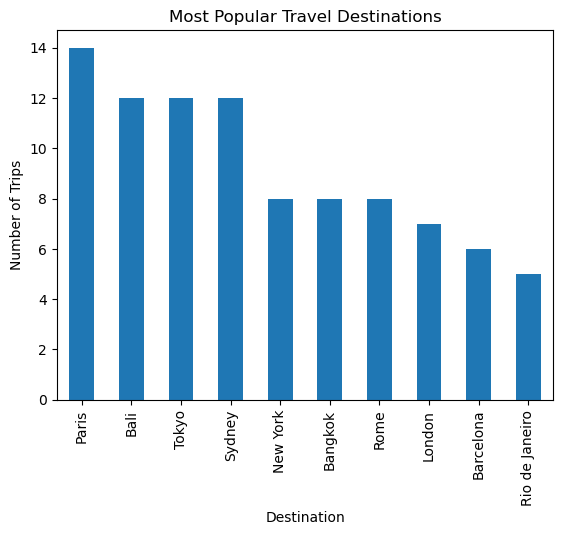

In [11]:
popular_destinations = df['Destination'].value_counts()[:10]

# Plot a bar chart of the most popular destinations
popular_destinations.plot.bar()

# Set the title and axis labels
plt.title('Most Popular Travel Destinations')
plt.xlabel('Destination')
plt.ylabel('Number of Trips')

# Display the graph
plt.show()

# **Display Most Common Travel Duration**

In [12]:
duration_counts = df['Duration (days)'].value_counts()

most_common_duration = duration_counts.idxmax()

print('The most common travel duration is', most_common_duration, 'days.')

The most common travel duration is 7.0 days.


# **Display 5 Most Common Transport Type**

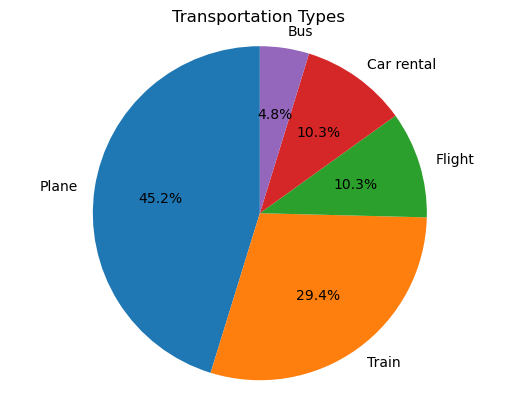

In [13]:
transport_counts = df['Transportation type'].value_counts()[:5]

labels = transport_counts.index.tolist()
sizes = transport_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Transportation Types')
plt.show()

# **Display 5 Most Common Accommodation Type**

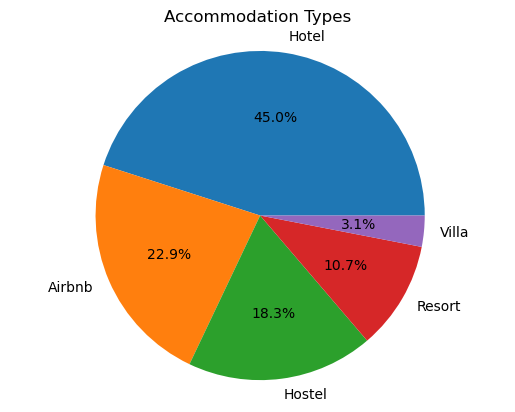

In [14]:
accomodations_counts = df['Accommodation type'].value_counts()[:5]

labels = accomodations_counts.index.tolist()
sizes = accomodations_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Accommodation Types')
plt.show()

# Identifying patterns and trends in travel behavior based on demographic variables such as age, gender, and nationality

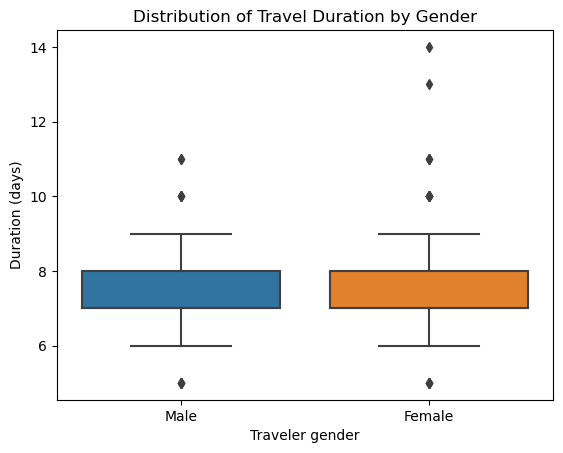

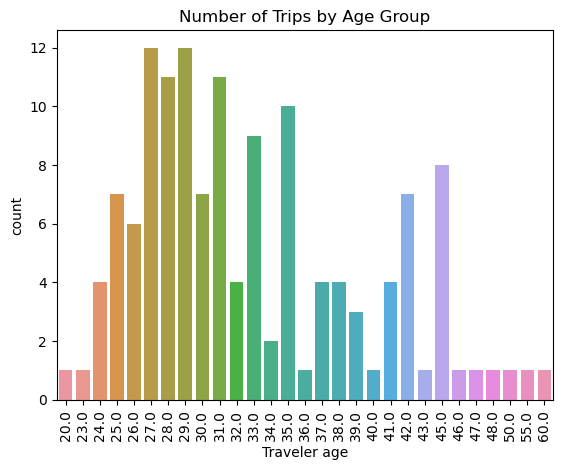

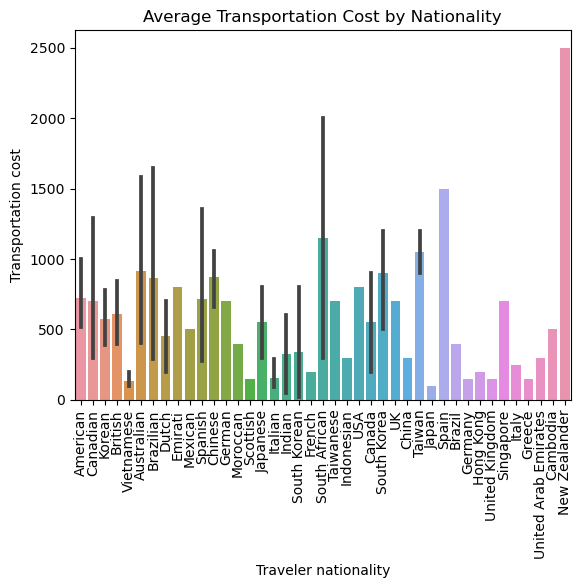

In [15]:
sns.boxplot(x='Traveler gender', y='Duration (days)', data=df)
plt.title('Distribution of Travel Duration by Gender')
plt.show()

# create a countplot to visualize the number of trips by age group
sns.countplot(x='Traveler age', data=df)
plt.title('Number of Trips by Age Group')
plt.xticks(rotation=90)
plt.show()

# create a barplot to visualize the average transportation cost by nationality
sns.barplot(x='Traveler nationality', y='Transportation cost', data=df)
plt.title('Average Transportation Cost by Nationality')
plt.xticks(rotation=90)
plt.show()